# SD212: Graph mining
## Lab 3: Graph structure

In this lab, you will learn to:
* work with **sparse matrices**,
* highlight the **small-world property** of a graph,
* estimate the **clustering coefficient** of a graph,
* generate a **Watts-Strogatz** graph with both the small-world property and a high clustering coefficient.

## Import

In [154]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [155]:
import numpy as np

In [156]:
from scipy import sparse as sp

In [157]:
import matplotlib.pyplot as plt

In [158]:
%matplotlib inline

In [159]:
import warnings
warnings.filterwarnings('ignore')

## Datasets

You will need the following datasets:
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools)
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).



## 1. Sparse matrices

You will work with adjacency matrices in [scipy CSR format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

In [160]:
# A simple graph
graph = nx.erdos_renyi_graph(10, 0.4)

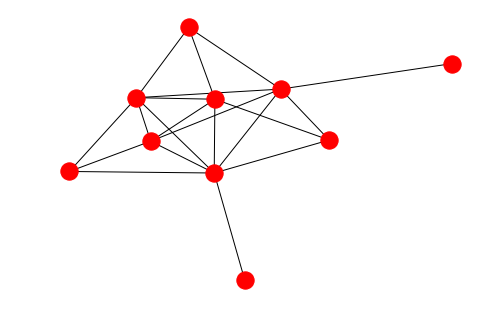

In [161]:
nx.draw(graph)

In [162]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 20
Average degree:   4.0000


In [163]:
# Density
n = graph.number_of_nodes()
m = graph.number_of_edges()
density = 2 * m / n / (n - 1)
print(density)

0.4444444444444444


In [164]:
# Dense adjacency matrix (numpy array)
adjacency = nx.to_numpy_array(graph)

In [165]:
adjacency

array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1., 1., 0., 0.]])

## CSR format

In [166]:
# Sparse adjacency matrix (scipy csr matrix)
adjacency = nx.to_scipy_sparse_matrix(graph)

In [167]:
adjacency

<10x10 sparse matrix of type '<class 'numpy.int32'>'
	with 40 stored elements in Compressed Sparse Row format>

In [168]:
adjacency.todense()

matrix([[0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [1, 0, 1, 0, 0, 0, 1, 1, 1, 1],
        [1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
        [1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 1, 0, 1, 1, 1, 1, 0, 0]], dtype=int32)

In [169]:
# Data
adjacency.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [170]:
# Indices (columns)
adjacency.indices

array([5, 6, 7, 8, 5, 8, 9, 6, 6, 8, 9, 0, 2, 6, 7, 8, 9, 0, 3, 4, 5, 7,
       8, 9, 0, 5, 6, 8, 9, 1, 2, 4, 5, 6, 7, 2, 4, 5, 6, 7], dtype=int32)

In [171]:
# Index pointers (rows)
adjacency.indptr

array([ 0,  3,  4,  7,  8, 11, 17, 24, 29, 35, 40], dtype=int32)

## To do

* Generate a new random graph of 10 nodes
* Get the corresponding adjacency matrix as numpy array
* Guess the first 3 entries and the last 3 entries of each vector of the adjacency matrix in ```scipy csr format```: ```data, indices, indptr```
* Check your guess.

In [172]:
graph = nx.erdos_renyi_graph(10, 0.4)
adjacency = nx.to_numpy_array(graph)
adjacency

array([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 1., 1., 0.]])

In [173]:
adjacency = nx.to_scipy_sparse_matrix(graph)
print (adjacency.data)
print (adjacency.indices)
print (adjacency.indptr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 8 2 8 9 0 1 5 6 7 8 4 6 3 2 6 2 3 5 7 8 9 2 6 9 0 1 2 6 9 1 6 7 8]
[ 0  2  5 11 13 14 16 22 25 30 34]


## Using sparse matrices

In [174]:
def get_degrees(adjacency):
    n = adjacency.shape[0]
    return adjacency.dot(np.ones(n, dtype = int))

In [175]:
get_degrees(adjacency)

array([2, 3, 6, 2, 1, 2, 6, 3, 5, 4], dtype=int32)

In [176]:
def get_neighbors(adjacency, node):
    n = adjacency.shape[0]
    unit_vector = np.zeros(n, dtype = int)
    unit_vector[node] = 1
    return adjacency.dot(unit_vector)

In [177]:
get_neighbors(adjacency, 0)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

## To do

* Write a function computing the distances from any given node (see below).<br>
Use distance -1 for nodes that are not accessible.

In [178]:
def get_distances(adjacency, node):
    n = adjacency.shape[0]
    distances = -np.ones(n, dtype = int)
    distances[node] = 0
    reached = np.zeros(n, dtype = int)
    reached[node] = 1
    t = 0
    new_nodes = True
    adjacency = adjacency.getH()
    while new_nodes:
        t += 1
        # to be modified (vector indicating nodes that can be reached in t hops)
        new_reached = reached + adjacency.dot(reached)
        new_reached[np.where(new_reached > 0)] = 1
        # end
        index = np.where(new_reached - reached > 0)[0]
        new_nodes = len(index)
        reached = new_reached
        distances[index] = t
        
    return distances

for i in range(10):
    print (get_distances(adjacency, i))

[0 2 1 3 4 2 2 2 1 2]
[2 0 1 3 4 2 2 2 1 1]
[1 1 0 2 3 1 1 1 1 2]
[3 3 2 0 1 2 1 2 2 2]
[4 4 3 1 0 3 2 3 3 3]
[2 2 1 2 3 0 1 2 2 2]
[2 2 1 1 2 1 0 1 1 1]
[2 2 1 2 3 2 1 0 2 1]
[1 1 1 2 3 2 1 2 0 1]
[2 1 2 2 3 2 1 1 1 0]


## 2. Small-world property

You will now make a few experiments highlighting the small-world property.

## To do

* Which fraction of the airports can be reached from Paris Charles de Gaulle in 1, 2, 3 flights?
* Which fraction of the pages are accessible from Paris in 1, 2, 3 clicks on Wikipedia for Schools?

In [221]:
openflights = nx.read_graphml("data/openflights.graphml", node_type = int)

In [222]:
weighted_adjacency = nx.to_scipy_sparse_matrix(openflights)
adjacency = nx.to_scipy_sparse_matrix(openflights, weight = None)

In [181]:
n = weighted_adjacency.shape[0]
for i in range(n):
    if ("Charles" in openflights.nodes[i]['name']):
        CDG_index = i
airports_reached = np.where(get_distances(adjacency, CDG_index) <= 3)[0]
print (len(airports_reached)/n)

0.5431062318372619


In [182]:
wiki_school = nx.read_graphml("data/wikipedia_schools.graphml", node_type = int)
adjacency = nx.to_scipy_sparse_matrix(wiki_school, weight = None)
n = adjacency.shape[0]
for i in range(n):
    if ("Paris" in wiki_school.nodes[i]['name']):
        paris_index = i
pages_reached = np.where(get_distances(adjacency, paris_index) <= 3)[0]
print (len(pages_reached)/n)

0.8812894794162491


## To do

Plot the histogram of the distance between two random airports sampled:
1. uniformly
2. in proportion to their degrees
3. in proportion to their traffics

Use 100 samples per histogram.

Interpret the results.

**Hint:** For 2 and 3, use the parameter ```p``` of the function ```np.random.choice```.

(array([117.,   0., 436.,   0., 340.,   0.,  80.,   0.,  24.,   3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

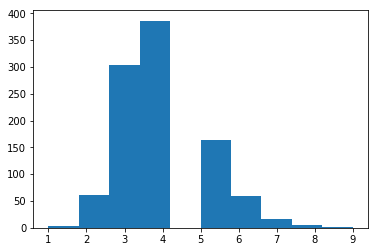

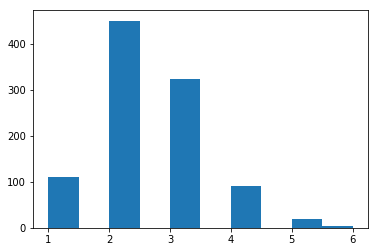

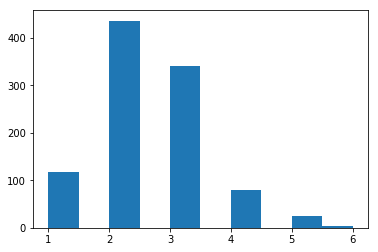

In [183]:
# 1. Two random airports, uniform sampling
airports = list(openflights.nodes())
distance_list = []
for i in range(1000):
    u,v = np.random.choice(airports, size = 2, replace = False)
    distance_list.append(nx.shortest_path_length(openflights, u, v))
plt.figure(1)
plt.hist(distance_list)

# 2.
weighted_adjacency = nx.to_scipy_sparse_matrix(openflights)
adjacency = nx.to_scipy_sparse_matrix(openflights, weight = None)
degrees = get_degrees(adjacency)
traffics = get_degrees(weighted_adjacency)
distance_list = []
for i in range(1000):
    u,v = np.random.choice(airports, size = 2, replace = False, p=degrees/np.sum(degrees))
    distance_list.append(nx.shortest_path_length(openflights, u, v))
plt.figure(2)
plt.hist(distance_list)

# 3.
distance_list = []
for i in range(1000):
    u,v = np.random.choice(airports, size = 2, replace = False, p=traffics/np.sum(traffics))
    distance_list.append(nx.shortest_path_length(openflights, u, v))
plt.figure(3)
plt.hist(distance_list)

## To do

* Find two airports with degree of separation higher than 8, and show the corresponding path on a map.
* Plot the histograms of the distances from each of these airports to all other airports.

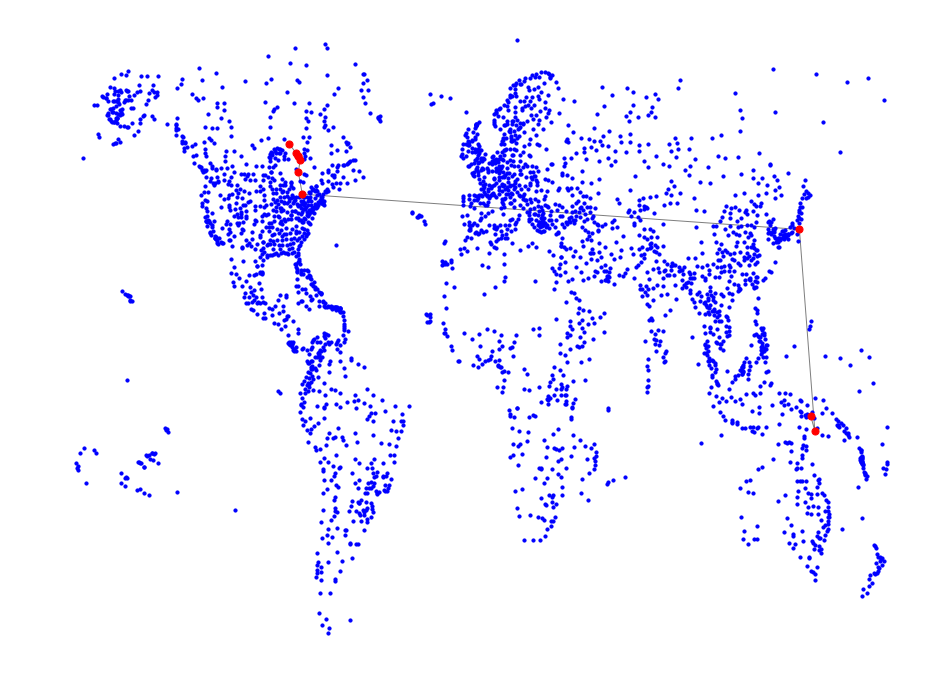

(array([2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.650e+02,
        1.479e+03, 1.176e+03, 2.260e+02, 4.400e+01]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

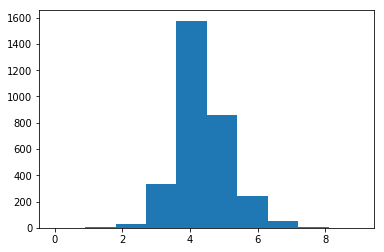

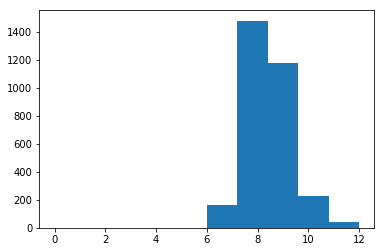

In [184]:
flag = 0
for u in airports:
    for v in airports:
        if (nx.shortest_path_length(openflights, u, v) > 8):
            flag = 1
            break
    if flag==1:
        break
            
# A shortest path 
path = nx.shortest_path(openflights, u, v)
path_tuple_list = []
for i in range(len(path)-1):
    path_tuple_list.append((path[i], path[i+1]))
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}

nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openflights, pos, nodelist = path, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(openflights, pos, edgelist=path_tuple_list, arrows = False, alpha = 0.5)
plt.show()

plt.figure(1)
plt.hist(get_distances(adjacency, u))
plt.figure(2)
plt.hist(get_distances(adjacency, v))

## To do

* Plot the histogram of the distances **from** Plato **to** any other page in Wikipedia for Schools (provided a path exists).
* Plot the histogram of the distances **to** Plato **from** any other page in Wikipedia for Schools (provided a path exists).

(array([1.000e+00, 0.000e+00, 7.600e+01, 0.000e+00, 0.000e+00, 1.431e+03,
        0.000e+00, 3.019e+03, 0.000e+00, 5.700e+01]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

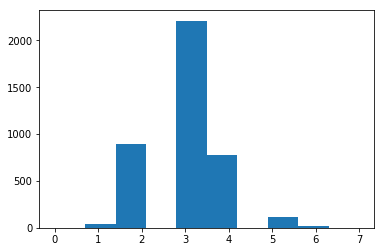

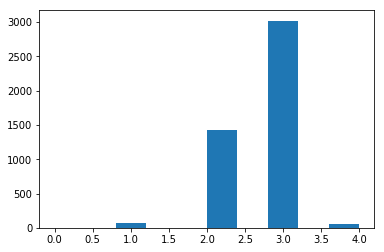

In [185]:
# wiki schools is directed
wiki_school = nx.read_graphml("data/wikipedia_schools.graphml", node_type = int)
adjacency = nx.to_scipy_sparse_matrix(wiki_school, weight = None)
n = adjacency.shape[0]
for i in range(n):
    if ("Plato" in wiki_school.nodes[i]['name']):
        plato_index = i

plt.figure(1)
distance_list_source = nx.shortest_path_length(wiki_school, source=plato_index).values()
plt.hist(distance_list_source)
plt.figure(2)
distance_list_target = nx.shortest_path_length(wiki_school, target=plato_index).values()
plt.hist(distance_list_target)

## To do

* Plot the histogram of the [Bacon number](https://fr.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon) of actors (**without** building the co-starring actor graph).

(array([  219.,  6693., 18781., 14084.,  3995.,   632.,   156.]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 7 Patch objects>)

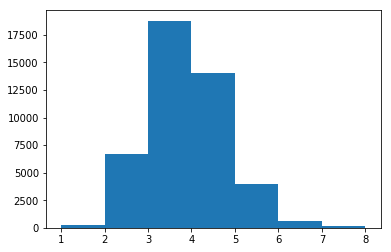

In [186]:
actors_movies = nx.read_graphml("data/actors_movies.graphml", node_type = int)
for i in actors_movies.nodes():
    if ("Kevin Bacon" in actors_movies.nodes[i]['name']):
        bacon_index = i
shortest_path_len_dict = nx.shortest_path_length(actors_movies, source=bacon_index)     
shortest_path_len_actor_list = []
for key, value in shortest_path_len_dict.items():
    if actors_movies.nodes[key]['type'] == 'actor':
        shortest_path_len_actor_list.append(int(value/2))
        
plt.hist(shortest_path_len_actor_list, bins=list(range(1, 9)))

## 3. Clustering coefficient

You will now learn to compute the clustering coefficient of a graph.

## To do

* Show that the clustering coefficient of node $u$ is equal to:
$$
C_u = \frac {N_u} {d_u(d_u-1)}
$$
where $N_u$ is the total number of paths of length 2 from $u$ to a neighbor of $u$.
* Write a function to compute the clustering coefficient of a node (see below).
* Deduce the clustering coefficient of the graph, given by:
$$
C = \frac{\sum_u d_u(d_u -1)C_u}{\sum_u d_u(d_u -1)}.
$$
* Compute the clustering coefficient of Openflights and Wikipedia for Schools (seen as an undirected graph).
* Compare your results with those of the function ```nx.average_clustering``` and explain the differences, if any.

In [248]:
def get_local_clustering_coefficient(graph, adjacency, node):
    # to be completed
    Nu = 0
    n = adjacency.shape[0]
    tmp = np.zeros(n)
    tmp[node] = 1
    neighbour_vect = adjacency.getH().dot(tmp).astype(int)
    neighbours = np.where(neighbour_vect == 1)[0]
    for neighbour in neighbours:
        simple_path_list = nx.all_simple_paths(graph, node, neighbour, cutoff=2)
        for path in simple_path_list:
            if len(path) == 3:
                Nu += 1
                
    du = np.sum(neighbour_vect)
    coef = Nu/(du * (du-1))
    return coef

In [249]:
def get_clustering_coefficient(graph, adjacency):
    coef = 0
    numerator = 0
    denominator = 0
    n = adjacency.shape[0]
    for i in range(n):
        du = graph.degree(i)
        if (du > 1):
            numerator += (du - 1) * du * get_local_clustering_coefficient(graph, adjacency, i)
            denominator += (du - 1) * du
    coef = numerator/denominator
    return coef

In [250]:
get_clustering_coefficient(openflights, adjacency)

0.25107219520077

In [230]:
nx.average_clustering(openflights)

0.47104596951619976

# 4. Watts-Strogatz model

Watts-Strogatz graphs have both the small-world property and a high clustering coefficient, for propertly chosen parameters.

In [193]:
graph = nx.watts_strogatz_graph(20,4,0)

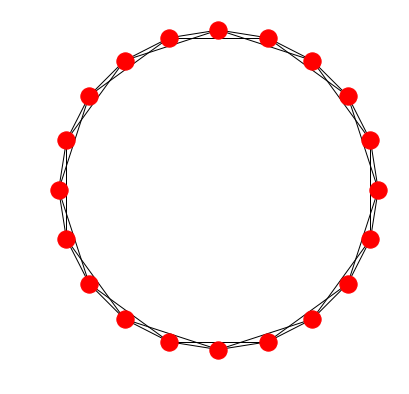

In [194]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

In [195]:
graph = nx.watts_strogatz_graph(20,4,0.5)

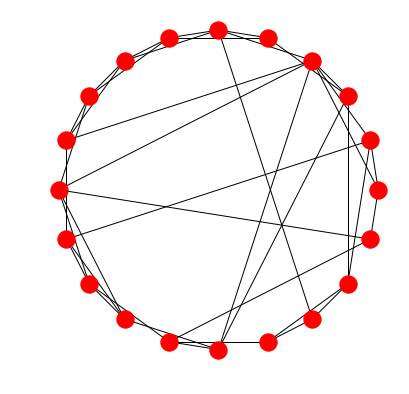

In [196]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

## To do

Generate a graph of 10,000 nodes with:
* average degree 20,
* average clustering coefficent larger than 0.5,
* average degree of separation less than 6.

**Hint:** To get an upper bound on the average path length between any pair of distinct nodes, you can consider all paths going through some well chosen node(s). 

In [212]:
p_list = np.arange(0, 1.01, 0.1)
for p in p_list:
    graph = nx.watts_strogatz_graph(10000, 20, p)
    average_clustering_coefficient = nx.average_clustering(graph)
    
    degrees = [graph.degree(node) for node in list(graph.nodes())]
    max_average_degree_of_separation = np.mean(list(nx.shortest_path_length(graph, source=np.argmin(degrees)).values()))
    
    if (average_clustering_coefficient >= 0.5) and (max_average_degree_of_separation <= 6):
        break